In [8]:
# imports for linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [ ]:
# take a look at the climate data
climate = pd.read_csv('./data/benue_climate_combined.csv')
climate.head()

,Month,Year,Sunshine,Wind Speed,Rainfall,Temperature,Humidity
0,Jan,2016,8.6,9,0.0,26.2,27
1,Feb,2016,6.8,7,0.0,29.9,39
2,Mar,2016,6.5,8,52.6,31.1,73
3,Apr,2016,7.2,9,76.9,30.3,73
4,May,2016,7.0,7,233.1,28.8,75


In [13]:
# plot function for climate metrics (rainfall, temp, humidity)
def plot_climate_metric(df, column, ylabel):
    plt.figure(figsize=(12, 6))
    for year, data in df.groupby("Year"):
        if year != 2025:
            plt.plot(data["Month"], data[column], marker="o", label=str(year))
    plt.title(f"Monthly {ylabel} in Benue State (2016-2024)")
    plt.xlabel("Month")
    plt.ylabel(ylabel)
    plt.legend(title="Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

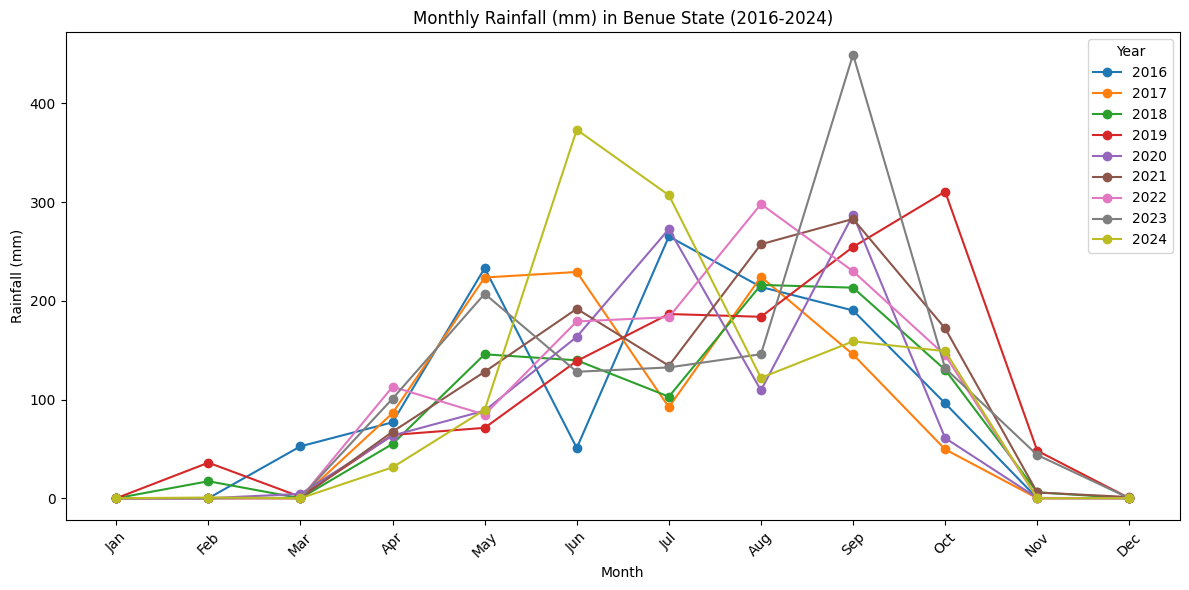

In [14]:
#plot rainfall
plot_climate_metric(climate, "Rainfall", "Rainfall (mm)")

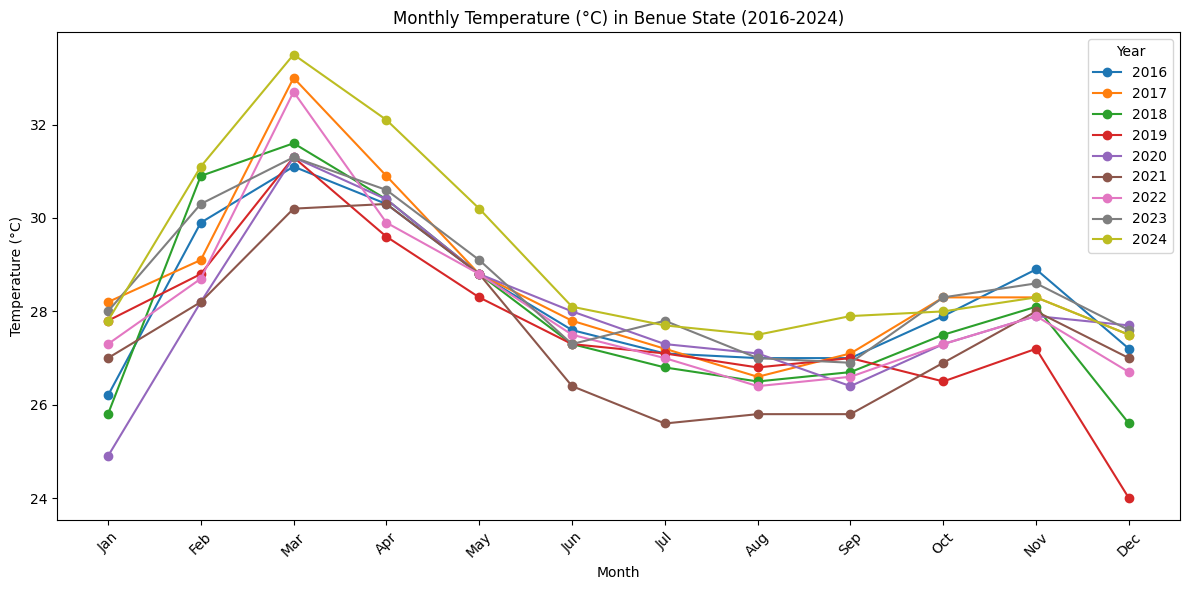

In [15]:
plot_climate_metric(climate, "Temperature", "Temperature (°C)")

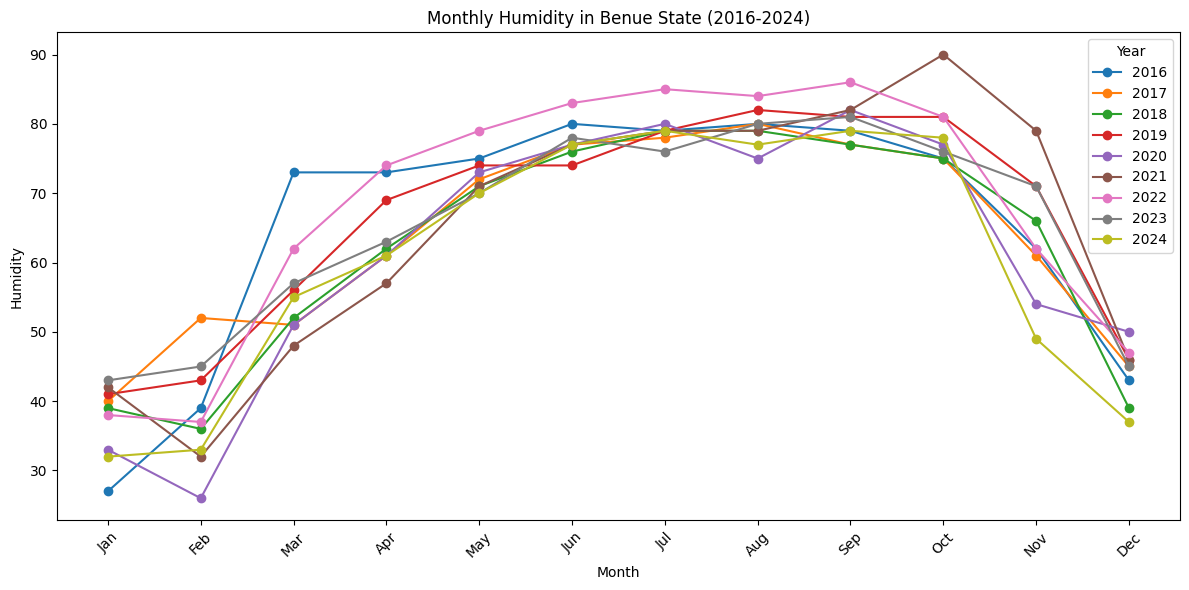

In [16]:
plot_climate_metric(climate, "Humidity", "Humidity")

### Malaria

In [44]:
# check out malaria data
malaria = pd.read_csv('./data/malaria_clean.csv')
malaria.head(20)

,LGA,Month,Year,Persons_fever,RDT_tested,positive_by_RDT,Microscopy_tested,positive_by_Microscopy,Month_Num,Date,RDT_Positive_Rate,Microscopy_Positive_Rate
0,Ado,December,2021,788,788,526,0.0,0.0,12.0,2021-12-01,0.667513,NaN
1,Ado,October,2021,470,470,325,0.0,0.0,10.0,2021-10-01,0.691489,NaN
2,Ado,July,2021,616,581,367,0.0,0.0,7.0,2021-07-01,0.631670,NaN
3,Ado,September,2021,652,652,352,0.0,0.0,9.0,2021-09-01,0.539877,NaN
4,Ado,August,2021,894,893,599,0.0,0.0,8.0,2021-08-01,0.670773,NaN
5,Ado,January,2021,540,538,341,0.0,0.0,1.0,2021-01-01,0.633829,NaN
6,Ado,May,2021,622,622,422,0.0,0.0,5.0,2021-05-01,0.678457,NaN
7,Ado,February,2021,479,466,315,13.0,8.0,2.0,2021-02-01,0.675966,0.615385
8,Ado,April,2021,582,578,389,0.0,0.0,4.0,2021-04-01,0.673010,NaN
9,Ado,March,2021,780,800,540,0.0,0.0,3.0,2021-03-01,0.675000,NaN


In [45]:
malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LGA                       1104 non-null   object 
 1   Month                     1104 non-null   object 
 2   Year                      1104 non-null   int64  
 3   Persons_fever             1104 non-null   int64  
 4   RDT_tested                1104 non-null   int64  
 5   positive_by_RDT           1104 non-null   int64  
 6   Microscopy_tested         1104 non-null   float64
 7   positive_by_Microscopy    1104 non-null   float64
 8   Month_Num                 1012 non-null   float64
 9   Date                      1012 non-null   object 
 10  RDT_Positive_Rate         1104 non-null   float64
 11  Microscopy_Positive_Rate  464 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 103.6+ KB


In [46]:
# check diff values
for column in malaria.select_dtypes(include=['object']).columns:
    unique_values = malaria[column].unique()
    print(f"{len(unique_values)} Unique values in '{column}': {unique_values}")

23 Unique values in 'LGA': [' Ado ' ' Agatu ' ' Apa ' ' Buruku ' ' Gboko ' ' Guma ' ' Gwer East '
 ' Gwer West ' ' Katsina-Ala ' ' Konshisha ' ' Kwande ' ' Logo '
 ' Makurdi ' ' Obi ' ' Ogbadibo ' ' Ohimini ' ' Oju ' ' Okpokwu '
 ' Otukpo ' ' Tarka ' ' Ukum ' ' Ushongo ' ' Vandeikya ']
12 Unique values in 'Month': ['December' 'October' 'July' 'September' 'August' 'January' 'May'
 'February' 'April' 'March' 'Novemr' 'June']
45 Unique values in 'Date': ['2021-12-01' '2021-10-01' '2021-07-01' '2021-09-01' '2021-08-01'
 '2021-01-01' '2021-05-01' '2021-02-01' '2021-04-01' '2021-03-01' nan
 '2021-06-01' '2022-02-01' '2022-05-01' '2022-04-01' '2022-09-01'
 '2022-07-01' '2022-12-01' '2022-03-01' '2022-06-01' '2022-01-01'
 '2022-10-01' '2022-08-01' '2023-01-01' '2023-10-01' '2023-07-01'
 '2023-09-01' '2023-08-01' '2023-02-01' '2023-12-01' '2023-03-01'
 '2023-06-01' '2023-05-01' '2023-04-01' '2024-02-01' '2024-06-01'
 '2024-08-01' '2024-01-01' '2024-12-01' '2024-10-01' '2024-05-01'
 '2024-03-01'

In [47]:
# change 'Novemr' to 'November' in Month column
malaria['Month'] = malaria['Month'].replace('Novemr', 'November')
malaria['Month'].unique()

array(['December', 'October', 'July', 'September', 'August', 'January',
       'May', 'February', 'April', 'March', 'November', 'June'],
      dtype=object)

In [48]:
# check for null values
malaria.isnull().sum()

LGA                           0
Month                         0
Year                          0
Persons_fever                 0
RDT_tested                    0
positive_by_RDT               0
Microscopy_tested             0
positive_by_Microscopy        0
Month_Num                    92
Date                         92
RDT_Positive_Rate             0
Microscopy_Positive_Rate    640
dtype: int64

In [49]:
malaria.head()

,LGA,Month,Year,Persons_fever,RDT_tested,positive_by_RDT,Microscopy_tested,positive_by_Microscopy,Month_Num,Date,RDT_Positive_Rate,Microscopy_Positive_Rate
0,Ado,December,2021,788,788,526,0.0,0.0,12.0,2021-12-01,0.667513,NaN
1,Ado,October,2021,470,470,325,0.0,0.0,10.0,2021-10-01,0.691489,NaN
2,Ado,July,2021,616,581,367,0.0,0.0,7.0,2021-07-01,0.631670,NaN
3,Ado,September,2021,652,652,352,0.0,0.0,9.0,2021-09-01,0.539877,NaN
4,Ado,August,2021,894,893,599,0.0,0.0,8.0,2021-08-01,0.670773,NaN


In [50]:
# investigate missing month numbers
malaria[malaria["Month_Num"].isnull()]["Month"].unique()

array(['November'], dtype=object)

In [51]:
# all missing month numbers are for 'November', so we can fill them in with 11
# drop date column 
malaria['Month_Num'] = malaria['Month_Num'].fillna(11)
malaria_filtered = malaria.drop(columns=['Date'])
malaria_filtered.isnull().sum()

LGA                           0
Month                         0
Year                          0
Persons_fever                 0
RDT_tested                    0
positive_by_RDT               0
Microscopy_tested             0
positive_by_Microscopy        0
Month_Num                     0
RDT_Positive_Rate             0
Microscopy_Positive_Rate    640
dtype: int64

In [52]:
malaria_filtered['Microscopy_tested'].value_counts()

Microscopy_tested
0.0      640
2.0       18
1.0       16
3.0       14
14.0      11
        ... 
757.0      1
121.0      1
122.0      1
319.0      1
127.0      1
Name: count, Length: 204, dtype: int64

In [53]:
640/1104

0.5797101449275363

### Observation

`microscopy_positive_rate` and `rdt_positive_rate` are the rate of positive people to tested people for each variable. 

most values of `microscopy_tested` is 0 (57%) i.e no-one was tested so no positives and no rate is the result.

next step: drop anything microscopy related at first

In [54]:
# drop all microscopy related columns
malaria_filtered.drop(columns=["Microscopy_tested", "positive_by_Microscopy", "Microscopy_Positive_Rate"], inplace=True)

In [58]:
# fix columns
malaria_filtered.columns = malaria_filtered.columns.str.lower()

In [59]:
malaria_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lga                1104 non-null   object 
 1   month              1104 non-null   object 
 2   year               1104 non-null   int64  
 3   persons_fever      1104 non-null   int64  
 4   rdt_tested         1104 non-null   int64  
 5   positive_by_rdt    1104 non-null   int64  
 6   month_num          1104 non-null   float64
 7   rdt_positive_rate  1104 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 69.1+ KB


In [69]:
# drop month as it's redundant
malaria_filtered.drop(columns=['month'], inplace=True)

In [72]:
# make month num of type int not float
malaria_filtered['month_num'] = malaria_filtered['month_num'].astype(int)
malaria_filtered.head(10)


,lga,year,persons_fever,rdt_tested,positive_by_rdt,month_num,rdt_positive_rate
0,Ado,2021,788,788,526,12,0.667513
1,Ado,2021,470,470,325,10,0.691489
2,Ado,2021,616,581,367,7,0.631670
3,Ado,2021,652,652,352,9,0.539877
4,Ado,2021,894,893,599,8,0.670773
5,Ado,2021,540,538,341,1,0.633829
6,Ado,2021,622,622,422,5,0.678457
7,Ado,2021,479,466,315,2,0.675966
8,Ado,2021,582,578,389,4,0.673010
9,Ado,2021,780,800,540,3,0.675000


### Cholera

In [73]:
cholera = pd.read_csv('./data/cholera_clean.csv')
cholera.head(10)

,disease,sex,age,age_group,date_of_report_dd_mm_yyyy,responsible_state,responsible_lga,facility,case_classification,investigation_status,outcome_of_case,present_condition_of_person,symptomatic,negative_test_result_for_disease,information_provided_by_physician,verification_of_different_pathogen,other,report_year,report_month,report_day
0,Cholera,Male,2,0--4,2025-05-06,Benue,Tarka,St Christopher`s Health Centre,Not yet classified,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,5,6
1,Cholera,Male,60,60--64,2025-04-29,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,29
2,Cholera,Male,10,10--14,2025-04-29,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,29
3,Cholera,Female,3,0--4,2025-04-25,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,25
4,Cholera,Female,25,25--29,2025-04-24,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,24
5,Cholera,Female,20,20--24,2025-04-24,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,24
6,Cholera,Female,25,25--29,2025-04-24,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,24
7,Cholera,Male,7,5--9,2025-04-24,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,24
8,Cholera,Female,1,0--4,2025-04-18,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,18
9,Cholera,Male,3,0--4,2025-04-18,Benue,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,No,No,No,No,2025,4,18


In [74]:
cholera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   disease                             785 non-null    object
 1   sex                                 785 non-null    object
 2   age                                 785 non-null    int64 
 3   age_group                           785 non-null    object
 4   date_of_report_dd_mm_yyyy           785 non-null    object
 5   responsible_state                   785 non-null    object
 6   responsible_lga                     785 non-null    object
 7   facility                            785 non-null    object
 8   case_classification                 785 non-null    object
 9   investigation_status                785 non-null    object
 10  outcome_of_case                     785 non-null    object
 11  present_condition_of_person         785 non-null    object

In [76]:
# check diff values
for column in cholera.select_dtypes(include=['object']).columns:
    unique_values = cholera[column].unique()
    print(f"{len(unique_values)} Unique values in '{column}': {unique_values}")

1 Unique values in 'disease': ['Cholera']
2 Unique values in 'sex': ['Male' 'Female']
17 Unique values in 'age_group': ['0--4' '60--64' '10--14' '25--29' '20--24' '5--9' '50--54' '55--59'
 '45--49' '65--69' '15--19' '70--74' '35--39' '30--34' '40--44' '80--84'
 '75--79']
188 Unique values in 'date_of_report_dd_mm_yyyy': ['2025-05-06' '2025-04-29' '2025-04-25' '2025-04-24' '2025-04-18'
 '2025-04-17' '2025-04-15' '2025-04-11' '2025-04-04' '2025-03-29'
 '2025-03-18' '2025-02-03' '2025-02-02' '2025-01-20' '2025-01-19'
 '2025-01-18' '2025-01-17' '2025-01-16' '2025-01-15' '2025-01-14'
 '2025-01-13' '2024-11-04' '2024-11-03' '2024-10-10' '2024-10-07'
 '2024-10-06' '2024-09-30' '2024-09-29' '2024-09-25' '2024-08-08'
 '2024-07-25' '2024-07-12' '2024-07-10' '2024-06-30' '2024-06-22'
 '2024-01-05' '2023-12-31' '2023-12-30' '2023-12-29' '2023-12-27'
 '2023-01-23' '2022-08-16' '2022-08-03' '2022-07-31' '2022-07-18'
 '2022-07-04' '2022-06-08' '2022-05-02' '2022-04-02' '2022-04-01'
 '2022-03-28' '202

In [77]:
# drop columns that have just 1 value
cholera_filtered = cholera.drop(columns=['disease', 'responsible_state', 'other', 'negative_test_result_for_disease', 'information_provided_by_physician', 'verification_of_different_pathogen'])

In [78]:
cholera_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex                          785 non-null    object
 1   age                          785 non-null    int64 
 2   age_group                    785 non-null    object
 3   date_of_report_dd_mm_yyyy    785 non-null    object
 4   responsible_lga              785 non-null    object
 5   facility                     785 non-null    object
 6   case_classification          785 non-null    object
 7   investigation_status         785 non-null    object
 8   outcome_of_case              785 non-null    object
 9   present_condition_of_person  785 non-null    object
 10  symptomatic                  785 non-null    object
 11  report_year                  785 non-null    int64 
 12  report_month                 785 non-null    int64 
 13  report_day                   785 no

In [80]:
# edit column name from 'date_of_report_dd_mm_yyyy' to 'date'
cholera_filtered.rename(columns={'date_of_report_dd_mm_yyyy': 'date'}, inplace=True)
cholera_filtered.head()

,sex,age,age_group,date,responsible_lga,facility,case_classification,investigation_status,outcome_of_case,present_condition_of_person,symptomatic,report_year,report_month,report_day
0,Male,2,0--4,2025-05-06,Tarka,St Christopher`s Health Centre,Not yet classified,Investigation pending,No Outcome Yet,Alive,No,2025,5,6
1,Male,60,60--64,2025-04-29,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,29
2,Male,10,10--14,2025-04-29,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,29
3,Female,3,0--4,2025-04-25,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,25
4,Female,25,25--29,2025-04-24,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,24


In [81]:
# convert date to datetime object
cholera_filtered['date'] = pd.to_datetime(cholera_filtered['date'], errors='coerce')
cholera_filtered.head(10)

,sex,age,age_group,date,responsible_lga,facility,case_classification,investigation_status,outcome_of_case,present_condition_of_person,symptomatic,report_year,report_month,report_day
0,Male,2,0--4,2025-05-06,Tarka,St Christopher`s Health Centre,Not yet classified,Investigation pending,No Outcome Yet,Alive,No,2025,5,6
1,Male,60,60--64,2025-04-29,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,29
2,Male,10,10--14,2025-04-29,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,29
3,Female,3,0--4,2025-04-25,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,25
4,Female,25,25--29,2025-04-24,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,24
5,Female,20,20--24,2025-04-24,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,24
6,Female,25,25--29,2025-04-24,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,24
7,Male,7,5--9,2025-04-24,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,24
8,Female,1,0--4,2025-04-18,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,18
9,Male,3,0--4,2025-04-18,Guma,Home or other place,Suspect case,Investigation pending,No Outcome Yet,Alive,No,2025,4,18


In [82]:
# drop age and retain age_group
cholera_filtered.drop(columns=['age'], inplace=True)

In [83]:
# check value counts of some columns
cols = ['facility', 'case_classification', 'investigation_status', 'outcome_of_case', 'present_condition_of_person']
for col in cols:
    print(f"Value counts for '{col}':\n{cholera_filtered[col].value_counts()}\n")

Value counts for 'facility':
facility
Home or other place                     522
Other facility                          219
Ogwule-Ogbaulu Primary Health Centre     13
Ijigban Primary Health Centre             6
Naka Comprehensive Health Centre          3
Oju General Hospital                      3
Ikyogen LG Health Centre                  2
Enungba Primary Health Centre             2
Egwuma Primary Health Centre              2
Ihigile-Oju Primary Health Centre         2
Mbaasham Primary Health Centre            1
Jor Primary Health Centre                 1
Tugudu Health Centre                      1
Tse-Agberagba General Hospital            1
St Christopher`s Health Centre            1
Ikachi Primary Health Centre              1
Bethesda Missionary Hospital              1
General Hospital Naka                     1
Ulayi Primary Health Centre               1
Hospital of Immaculate                    1
Tongov Primary Health Care Clinic         1
Name: count, dtype: int64

Value count